In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from math import sqrt
from sklearn import preprocessing
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [21]:
dataset = datasets.load_boston()
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

### Attribute Information
* CRIM : 도시 별 범죄율
* ZN : 25,000 평방피트 초과 거주 지역 비율
* INDUS : 도시 별 비소매 상업지역 면적 비율
* CHAS : 찰스강의 경계에 위치한 경우는 1, 아니면 0
* NOX : 일산화질소 농도(1000만분의 1 단위)
* RM : 가구 당 평균 객실 수
* AGE : 1940년 이전에 건축된 주택의 비율
* DIS : 5개의 보스턴 고용 센터까지의 가중 거리
* RAD : 고속도로까지의 접근성 지수
* TAX : 1만 달러 당 재산세율
* PTRATIO : 도시 별 학생 대 교사 비율
* B : 인구 중 흑인 비율
* LSTAT : 인구 중 하위 계층 비율
* MEDV : 주택 가격 중앙값 (단위 1,000 달러)

In [22]:
df_x = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df_y = pd.DataFrame(dataset.target, columns=['MEDV'])

df = pd.concat([df_x, df_y], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [23]:
# numerical data VS categorical data
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
df.columns.values.tolist()

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

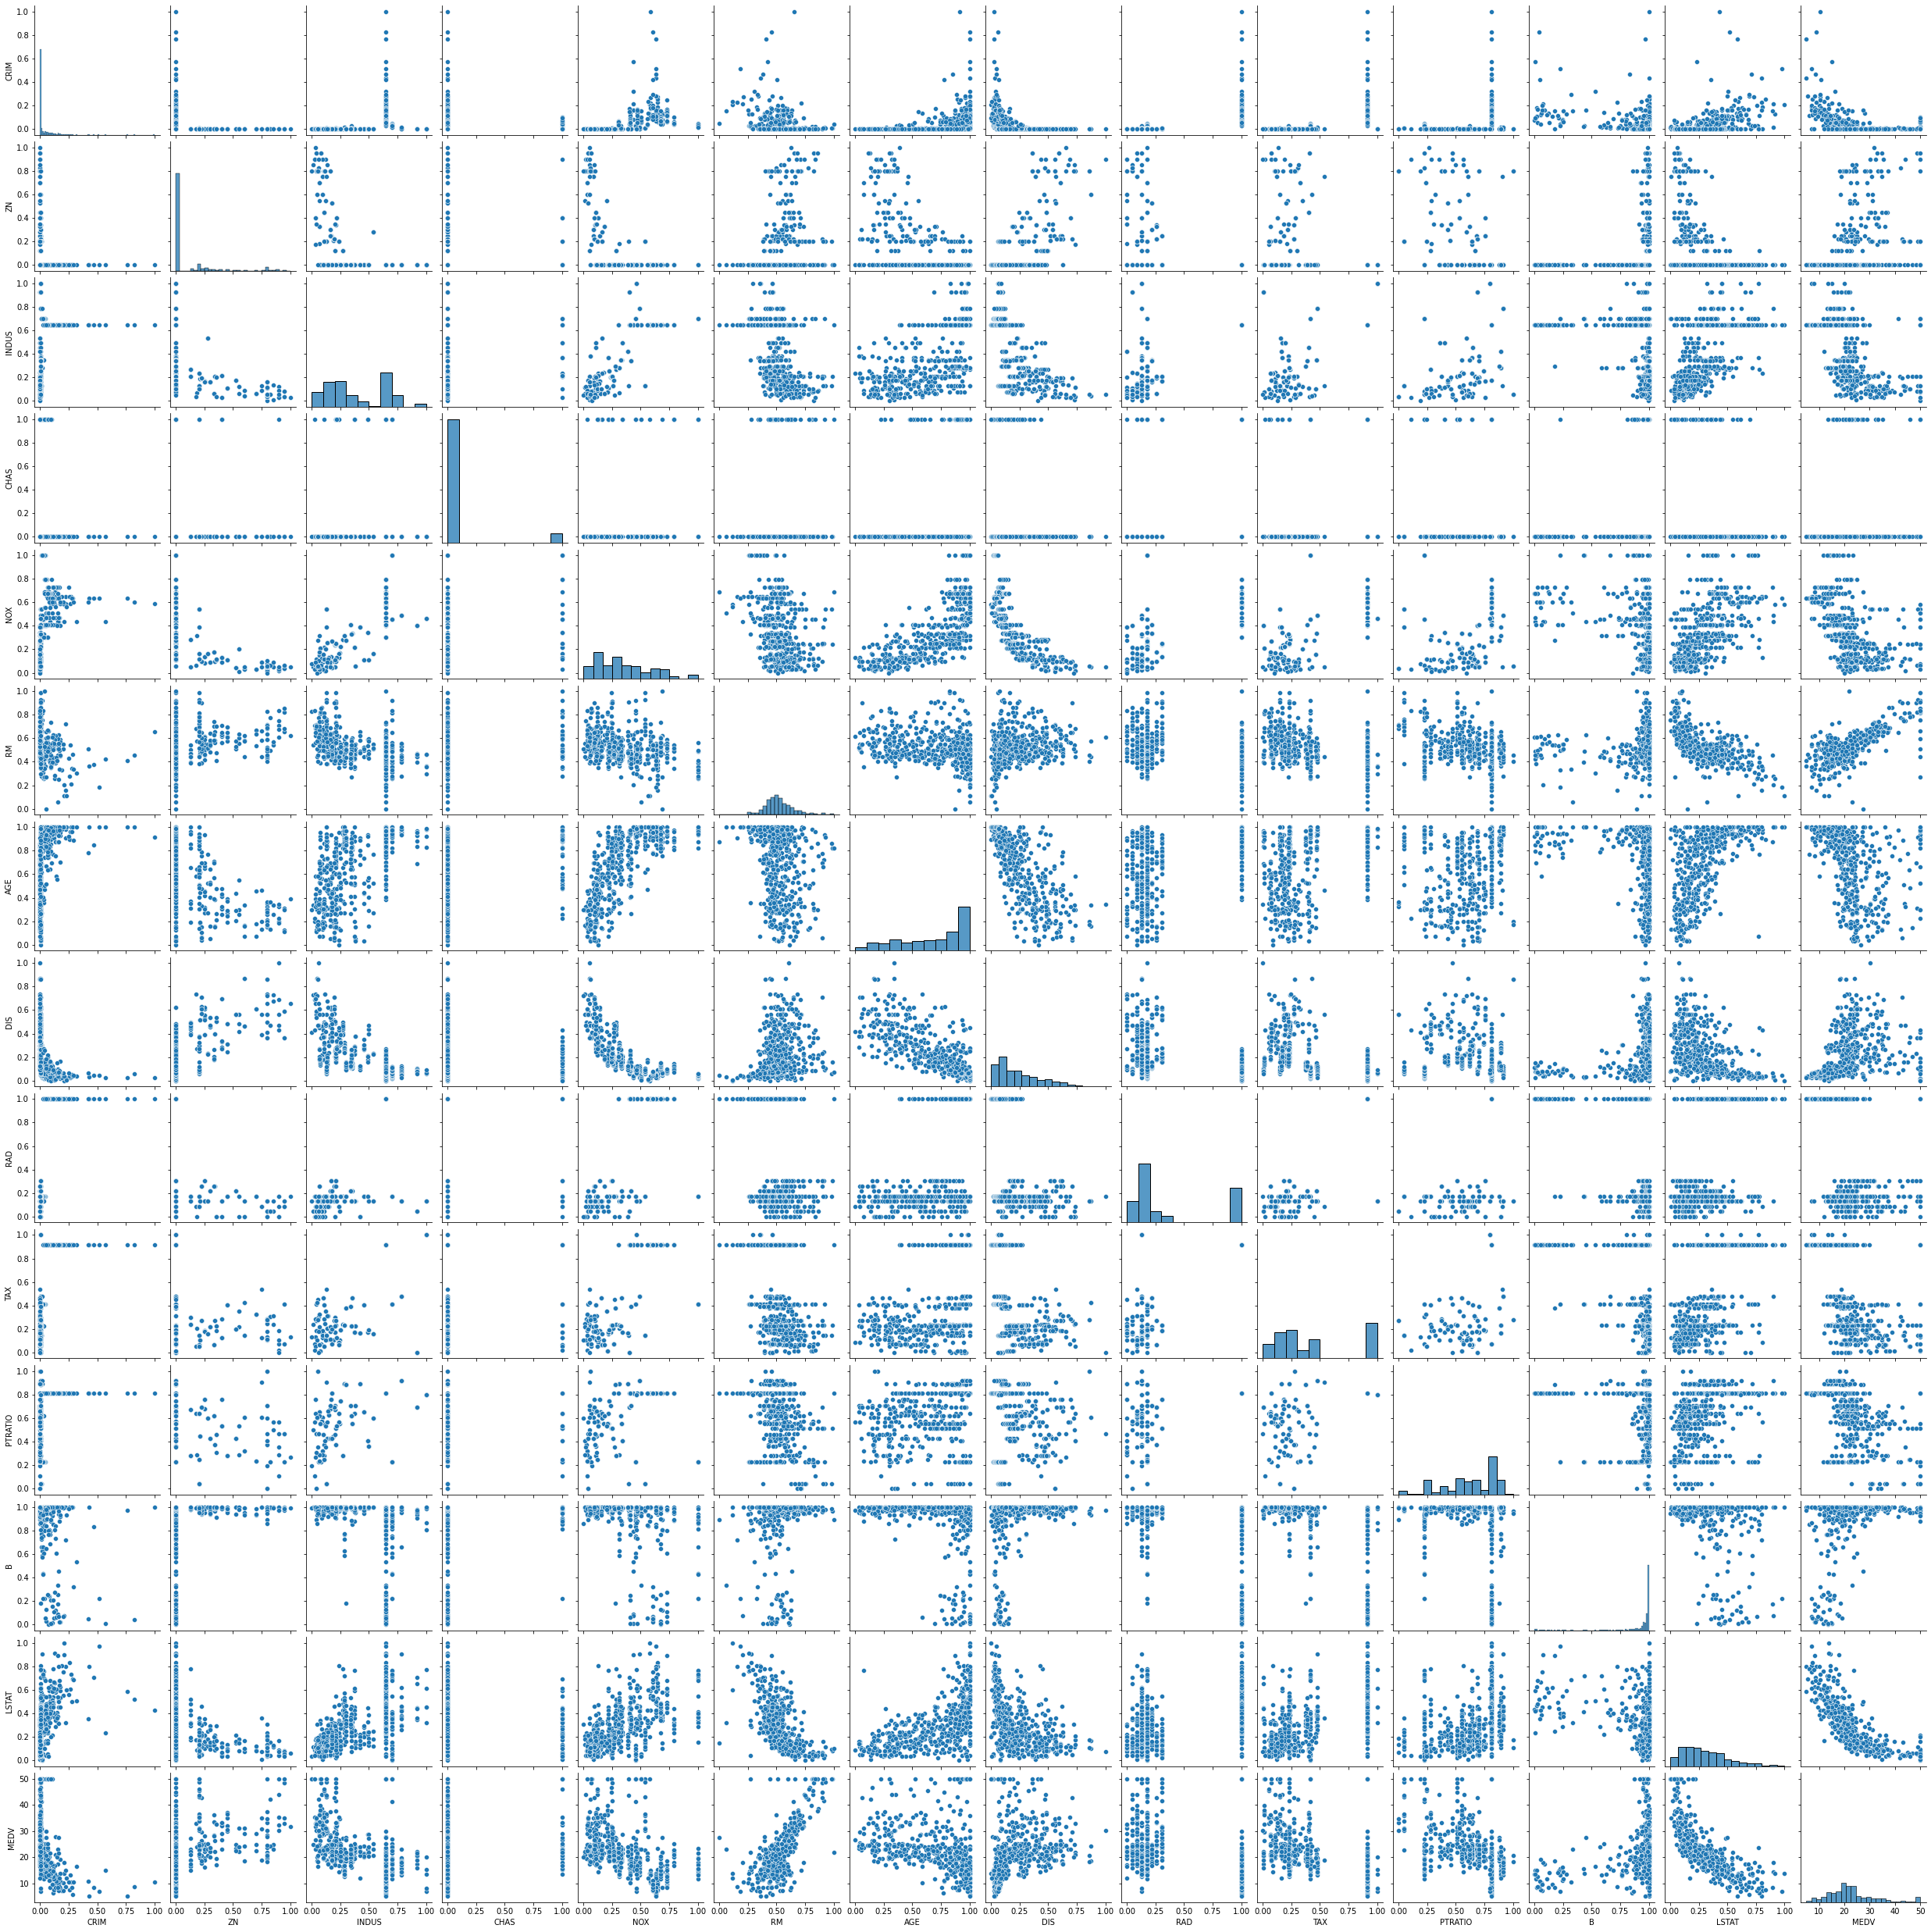

In [15]:
sns.pairplot(df[df.columns.values.tolist()])
plt.show()

In [16]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [24]:
min_max_scaler = preprocessing.MinMaxScaler()
scale_columns = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df_x[scale_columns] = min_max_scaler.fit_transform(df_x[scale_columns])

In [25]:
df_x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


In [26]:
df_x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040544,0.113636,0.391378,0.069170,0.349167,0.521869,0.676364,0.242381,0.371713,0.422208,0.622929,0.898568,0.301409
std,0.096679,0.233225,0.251479,0.253994,0.238431,0.134627,0.289896,0.191482,0.378576,0.321636,0.230313,0.230205,0.197049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000851,0.000000,0.173387,0.000000,0.131687,0.445392,0.433831,0.088259,0.130435,0.175573,0.510638,0.945730,0.144040
50%,0.002812,0.000000,0.338343,0.000000,0.314815,0.507281,0.768280,0.188949,0.173913,0.272901,0.686170,0.986232,0.265728
75%,0.041258,0.125000,0.646628,0.000000,0.491770,0.586798,0.938980,0.369088,1.000000,0.914122,0.808511,0.998298,0.420116
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
train_X, test_X, train_y, test_y = train_test_split(df_x, df_y, test_size = 0.3)
print(len(train_X), len(test_X), len(train_y), len(test_y))

354 152 354 152


In [43]:
train_X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
144,0.031173,0.0,0.700880,0.0,1.000000,0.257137,0.977343,0.019669,0.173913,0.412214,0.223404,1.000000,0.760486
194,0.000091,0.6,0.090543,0.0,0.032922,0.583062,0.163749,0.462858,0.000000,0.148855,0.319149,0.949065,0.073124
314,0.004079,0.0,0.346041,0.0,0.327160,0.575972,0.869207,0.224854,0.130435,0.223282,0.617021,0.996949,0.208333
256,0.000102,0.9,0.120601,0.0,0.018519,0.745928,0.322348,0.473452,0.086957,0.108779,0.351064,0.973372,0.038079
84,0.000498,0.0,0.147727,0.0,0.131687,0.541866,0.464470,0.331894,0.086957,0.114504,0.627660,1.000000,0.217715


In [44]:
train_y.head()

,MEDV
144,11.8
194,29.1
314,23.8
256,44.0
84,23.9


In [45]:
m_reg = sm.OLS(train_y, train_X).fit()
print(m_reg.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              586.4
Date:                Sun, 27 Mar 2022   Prob (F-statistic):                   2.79e-224
Time:                        09:16:45   Log-Likelihood:                         -1081.6
No. Observations:                 354   AIC:                                      2189.
Df Residuals:                     341   BIC:                                      2240.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [47]:
pred_y = np.array(m_reg.predict(test_X))
pred_y

array([19.77853034, 28.96575845, 21.01222671,  8.88983331, 33.84124272,
       16.68911624,  5.32921117, 24.0216993 , 18.85560418, 25.52437546,
       14.94595609, 28.67460129, 22.41164484, 36.84153241, 25.09023826,
       21.50987689, 22.36397119, 26.23286634, 22.29215447, 19.5966417 ,
       34.14543859, 15.80301954, 15.06800213, 21.1408922 , 24.17524749,
       16.40863663, 19.51372021,  6.08043316, 20.07396088, 20.69878263,
       14.84257334, 18.40104372, 22.7986638 , 18.98748827, 31.24515903,
       16.5725785 , 22.71318545,  6.2205486 , 14.65870304, 39.39536343,
       12.90930851, 17.28830315, 18.61496224, 18.60505188, 19.53458251,
       29.31365605, 18.72409933, 19.87697532, 26.16380141, 27.01871715,
       27.17019197, 16.54946232, 16.85096466, 18.7650152 , 19.88351416,
       21.0193019 , 23.66116878, 31.89082196, 34.77294598, 29.41684398,
       11.21601621, 23.20547637, 17.05825575,  6.19650306, 19.75841331,
       19.60330701, 23.55982696, 21.4054709 , 30.18974467, 13.57

In [51]:
pred_y.shape[0]

152

In [52]:
pred_y = pred_y.reshape(pred_y.shape[0], 1)
test_y = np.array(test_y)
print(sqrt(mean_squared_error(test_y, pred_y)))

5.573277484695302


In [53]:
train_X.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.197882,0.402001,-0.048080,0.418196,-0.188501,0.341857,-0.365865,0.604074,0.569707,0.276266,-0.318670,0.445253
ZN,-0.197882,1.000000,-0.549750,-0.078967,-0.521738,0.302384,-0.583332,0.673849,-0.317629,-0.315907,-0.394265,0.179497,-0.425572
INDUS,0.402001,-0.549750,1.000000,0.062078,0.776016,-0.429571,0.651662,-0.710035,0.605606,0.719359,0.403936,-0.371953,0.630507
CHAS,-0.048080,-0.078967,0.062078,1.000000,0.096157,0.061666,0.089506,-0.111232,-0.004162,-0.033008,-0.102609,0.022948,-0.031741
NOX,0.418196,-0.521738,0.776016,0.096157,1.000000,-0.297405,0.754767,-0.776754,0.612801,0.668190,0.182789,-0.406896,0.611112
RM,-0.188501,0.302384,-0.429571,0.061666,-0.297405,1.000000,-0.253210,0.176924,-0.216494,-0.309421,-0.371696,0.130630,-0.616703
AGE,0.341857,-0.583332,0.651662,0.089506,0.754767,-0.253210,1.000000,-0.771192,0.468171,0.515693,0.268911,-0.283289,0.612572
DIS,-0.365865,0.673849,-0.710035,-0.111232,-0.776754,0.176924,-0.771192,1.000000,-0.496282,-0.531736,-0.216381,0.287350,-0.505970
RAD,0.604074,-0.317629,0.605606,-0.004162,0.612801,-0.216494,0.468171,-0.496282,1.000000,0.917631,0.459256,-0.440346,0.507039
TAX,0.569707,-0.315907,0.719359,-0.033008,0.668190,-0.309421,0.515693,-0.531736,0.917631,1.000000,0.448055,-0.443941,0.566682


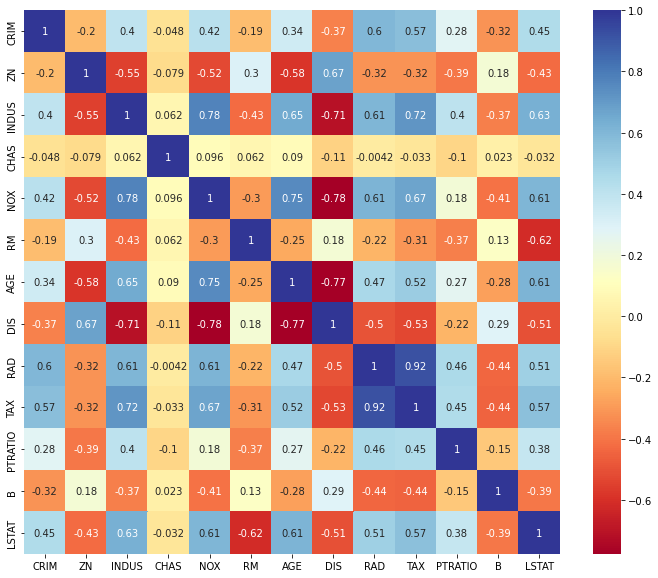

In [54]:
plt.figure(figsize=(12, 10))
sns.heatmap(train_X.corr(), annot = True, cmap = 'RdYlBu')
plt.show()

In [55]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train_X.values, i) for i in range(train_X.shape[1])]
vif["features"] = train_X.columns
vif

,VIF Factor,features
0,1.926516,CRIM
1,3.023499,ZN
2,13.321739,INDUS
3,1.125648,CHAS
4,13.180783,NOX
5,15.965355,RM
6,19.489049,AGE
7,8.578419,DIS
8,15.343782,RAD
9,25.151466,TAX


In [56]:
tmp_train_X1 = train_X.drop('TAX', axis=1)
tmp_train_X1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
144,0.031173,0.00,0.700880,0.0,1.000000,0.257137,0.977343,0.019669,0.173913,0.223404,1.000000,0.760486
194,0.000091,0.60,0.090543,0.0,0.032922,0.583062,0.163749,0.462858,0.000000,0.319149,0.949065,0.073124
314,0.004079,0.00,0.346041,0.0,0.327160,0.575972,0.869207,0.224854,0.130435,0.617021,0.996949,0.208333
256,0.000102,0.90,0.120601,0.0,0.018519,0.745928,0.322348,0.473452,0.086957,0.351064,0.973372,0.038079
84,0.000498,0.00,0.147727,0.0,0.131687,0.541866,0.464470,0.331894,0.086957,0.627660,1.000000,0.217715
...,...,...,...,...,...,...,...,...,...,...,...,...
437,0.170517,0.00,0.646628,0.0,0.730453,0.496455,1.000000,0.071347,1.000000,0.808511,0.022694,0.682119
493,0.001877,0.00,0.338343,0.0,0.411523,0.411190,0.526262,0.113859,0.217391,0.702128,1.000000,0.283664
196,0.000380,0.80,0.038856,0.0,0.039095,0.713930,0.321318,0.561922,0.043478,0.000000,1.000000,0.064845
299,0.000554,0.70,0.065249,0.0,0.030864,0.666794,0.073120,0.609099,0.173913,0.234043,0.936154,0.083057


In [57]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(tmp_train_X1.values, i) for i in range(tmp_train_X1.shape[1])]
vif["features"] = tmp_train_X1.columns
vif

,VIF Factor,features
0,1.926475,CRIM
1,2.874110,ZN
2,10.956253,INDUS
3,1.110689,CHAS
4,13.130360,NOX
5,15.848394,RM
6,19.442118,AGE
7,8.563615,DIS
8,5.268107,RAD
9,13.553097,PTRATIO


In [58]:
vif['features'].tolist()

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'PTRATIO',
 'B',
 'LSTAT']

In [59]:
train_x_tmp = train_X[vif['features'].tolist()]
m_reg = sm.OLS(train_y, train_x_tmp).fit()
print(m_reg.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              626.1
Date:                Sun, 27 Mar 2022   Prob (F-statistic):                   1.86e-224
Time:                        09:26:17   Log-Likelihood:                         -1084.6
No. Observations:                 354   AIC:                                      2193.
Df Residuals:                     342   BIC:                                      2240.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [60]:
test_X = test_X[train_x_tmp.columns.tolist()]
pred_y = np.array(m_reg.predict(test_X)).reshape(test_X.shape[0], 1)
test_y = np.array(test_y)
print(sqrt(mean_squared_error(test_y, pred_y)))

5.596323155262706


In [61]:
tmp_train_X2 = tmp_train_X1.drop('AGE', axis=1)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(tmp_train_X2.values, i) for i in range(tmp_train_X2.shape[1])]
vif["features"] = tmp_train_X2.columns
vif

,VIF Factor,features
0,1.924455,CRIM
1,2.852311,ZN
2,10.956191,INDUS
3,1.109179,CHAS
4,11.385038,NOX
5,13.470915,RM
6,7.848544,DIS
7,5.218953,RAD
8,13.137337,PTRATIO
9,15.431648,B


In [62]:
train_x_tmp = train_X[vif['features'].tolist()]
m_reg = sm.OLS(train_y, train_x_tmp).fit()
print(m_reg.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              683.2
Date:                Sun, 27 Mar 2022   Prob (F-statistic):                   1.09e-225
Time:                        09:30:03   Log-Likelihood:                         -1085.0
No. Observations:                 354   AIC:                                      2192.
Df Residuals:                     343   BIC:                                      2235.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [63]:
test_X = test_X[train_x_tmp.columns.tolist()]
pred_y = np.array(m_reg.predict(test_X)).reshape(test_X.shape[0], 1)
test_y = np.array(test_y)
print(sqrt(mean_squared_error(test_y, pred_y)))

5.6120413361954595


In [64]:
tmp_train_X3 = tmp_train_X2.drop('NOX', axis=1)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(tmp_train_X3.values, i) for i in range(tmp_train_X3.shape[1])]
vif["features"] = tmp_train_X3.columns
vif

,VIF Factor,features
0,1.921973,CRIM
1,2.846843,ZN
2,8.390215,INDUS
3,1.106910,CHAS
4,11.885834,RM
5,7.233582,DIS
6,4.852561,RAD
7,12.320212,PTRATIO
8,15.274291,B
9,6.053548,LSTAT


In [65]:
train_x_tmp = train_X[vif['features'].tolist()]
m_reg = sm.OLS(train_y, train_x_tmp).fit()
print(m_reg.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              749.7
Date:                Sun, 27 Mar 2022   Prob (F-statistic):                   9.24e-227
Time:                        09:31:01   Log-Likelihood:                         -1085.9
No. Observations:                 354   AIC:                                      2192.
Df Residuals:                     344   BIC:                                      2231.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(df_x, df_y, test_size = 0.3)
print(len(train_X), len(test_X), len(train_y), len(test_y))

In [66]:
test_X = test_X[train_x_tmp.columns.tolist()]
pred_y = np.array(m_reg.predict(test_X)).reshape(test_X.shape[0], 1)
test_y = np.array(test_y)
print(sqrt(mean_squared_error(test_y, pred_y)))

5.613259752480256


In [67]:
tmp_train_X4 = tmp_train_X3.drop('INDUS', axis=1)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(tmp_train_X4.values, i) for i in range(tmp_train_X4.shape[1])]
vif["features"] = tmp_train_X4.columns
vif

,VIF Factor,features
0,1.913440,CRIM
1,2.843694,ZN
2,1.100229,CHAS
3,11.667427,RM
4,6.386557,DIS
5,4.516656,RAD
6,11.675525,PTRATIO
7,14.896326,B
8,4.789558,LSTAT


In [68]:
train_x_tmp = train_X[vif['features'].tolist()]
m_reg = sm.OLS(train_y, train_x_tmp).fit()
print(m_reg.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              835.4
Date:                Sun, 27 Mar 2022   Prob (F-statistic):                   3.11e-228
Time:                        09:31:36   Log-Likelihood:                         -1085.9
No. Observations:                 354   AIC:                                      2190.
Df Residuals:                     345   BIC:                                      2225.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(df_x, df_y, test_size = 0.3)
print(len(train_X), len(test_X), len(train_y), len(test_y))

In [69]:
test_X = test_X[train_x_tmp.columns.tolist()]
pred_y = np.array(m_reg.predict(test_X)).reshape(test_X.shape[0], 1)
test_y = np.array(test_y)
print(sqrt(mean_squared_error(test_y, pred_y)))

5.612666351029744


In [70]:
tmp_train_X5 = tmp_train_X4.drop('RAD', axis=1)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(tmp_train_X5.values, i) for i in range(tmp_train_X5.shape[1])]
vif["features"] = tmp_train_X5.columns
vif

,VIF Factor,features
0,1.602345,CRIM
1,2.794072,ZN
2,1.097967,CHAS
3,10.983522,RM
4,5.954743,DIS
5,9.586548,PTRATIO
6,14.015549,B
7,4.527244,LSTAT


In [71]:
train_x_tmp = train_X[vif['features'].tolist()]
m_reg = sm.OLS(train_y, train_x_tmp).fit()
print(m_reg.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              935.4
Date:                Sun, 27 Mar 2022   Prob (F-statistic):                   3.46e-229
Time:                        09:32:37   Log-Likelihood:                         -1087.2
No. Observations:                 354   AIC:                                      2190.
Df Residuals:                     346   BIC:                                      2221.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [72]:
train_X, test_X, train_y, test_y = train_test_split(df_x, df_y, test_size = 0.3)
print(len(train_X), len(test_X), len(train_y), len(test_y))

354 152 354 152


In [73]:
test_X = test_X[train_x_tmp.columns.tolist()]
pred_y = np.array(m_reg.predict(test_X)).reshape(test_X.shape[0], 1)
test_y = np.array(test_y)
print(sqrt(mean_squared_error(test_y, pred_y)))

5.014929308693026


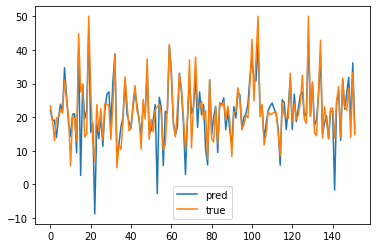

In [74]:
plt.plot(pred_y, label = "pred")
plt.plot(test_y, label = "true")
plt.legend()
plt.show()

### Attribute Information
* CRIM : 도시 별 범죄율
* ZN : 25,000 평방피트 초과 거주 지역 비율
* INDUS : 도시 별 비소매 상업지역 면적 비율
* CHAS : 찰스강의 경계에 위치한 경우는 1, 아니면 0
* NOX : 일산화질소 농도(1000만분의 1 단위)
* RM : 가구 당 평균 객실 수
* AGE : 1940년 이전에 건축된 주택의 비율
* DIS : 5개의 보스턴 고용 센터까지의 가중 거리
* RAD : 고속도로까지의 접근성 지수
* TAX : 1만 달러 당 재산세율
* PTRATIO : 도시 별 학생 대 교사 비율
* B : 인구 중 흑인 비율
* LSTAT : 인구 중 하위 계층 비율
* MEDV : 주택 가격 중앙값 (단위 1,000 달러)

MEDV = (39.1883 * RM) 
       + (8.9572 * B) 
       + (3.7883 * ZN) 
       + (2.9083 * CHAS) 
       + (-3.9400 * PTRATIO) 
       + (-4.8396 * DIS) 
       + (-9.7033 * LSTAT) 
       + (-9.9254 * CRIM)